In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [2]:
# You can access from https://www.kaggle.com/uciml/german-credit
# Read input file and understand the data
# "default" is my dependent variable

In [3]:
german_cr_df = pd.read_csv("german_credit.csv")  

In [4]:
german_cr_df.shape

(1000, 21)

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [5]:
german_cr_50_df = german_cr_df.sample(frac = 0.5)

In [6]:
german_cr_50_df.shape

(500, 21)

In [7]:
german_cr_df.shape

(1000, 21)

In [8]:
### Used Sample function instead of train test split as train test split is required to be done in next question

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [9]:
german_cr_50_df = pd.get_dummies(german_cr_50_df, drop_first = True)

In [10]:
german_cr_50_df.head().T

,862,577,7,601,836
default,1,0,0,1,0
duration_in_month,24,24,36,9,12
credit_amount,2439,1927,6948,918,886
installment_as_income_perc,4,3,2,4,4
present_res_since,4,2,2,1,2
age,35,33,35,30,21
credits_this_bank,1,2,1,1,1
people_under_maintenance,1,1,1,1,1
account_check_status_< 0 DM,1,0,0,0,0
account_check_status_>= 200 DM / salary assignments for at least 1 year,0,0,0,0,0


### Check for highly correlated variables but don't required any treatment for this use case

In [11]:
german_cr_df.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


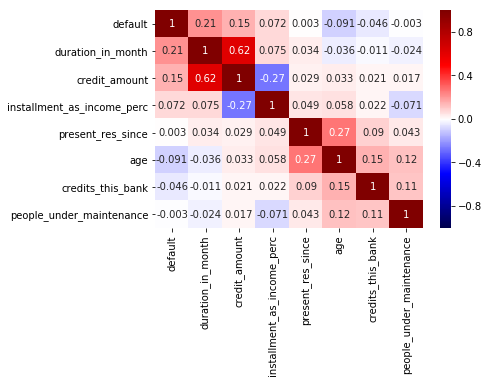

In [12]:
german_corr = german_cr_df.corr()
sns.heatmap(german_corr, cmap='seismic', annot=True, vmax=1, vmin=-1)

In [13]:
### Duration in Month and Credit Amount are highly corelated variables
### None of the other variables are highly corelated. Some show positive corelation

In [14]:
german_cr_df.isna().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

In [15]:
### There are no missing or null values
### These variables do not need any treatment for now.
### Also since duration in month and amount are numeric values and not highly corelated 
### they do not need exclusion from the Dummies transformed dataframe

### Drop the original variables which are converted to dummy

In [16]:
### The transformed dataframe german_cr_50_df has dropped the original variables already

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [17]:
# Creating the data set in X y sets with independent and dependent variables
X = german_cr_50_df[german_cr_50_df.columns[1:]]
y = german_cr_50_df["default"]

In [18]:
### Split the dataframe into 70:30 random sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 500,n_jobs=2,criterion="entropy",random_state=9999)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [20]:
### Train the model on the Training set
rfcl = rfcl.fit(X_train, y_train)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [21]:
rfcl.score(X_test , y_test)

0.76

In [22]:
from sklearn import metrics
y_predict = rfcl.predict(X_test)

In [23]:
print(metrics.accuracy_score(y_test, y_predict))

0.76


In [24]:
print(metrics.confusion_matrix(y_test, y_predict))

[[96  3]
 [33 18]]


### Q6 Show the list of the features importance( 1 Marks)

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [26]:
X.shape

(500, 48)

In [27]:
#Select all best Features
best_fit = SelectKBest(score_func=chi2, k=20)
best_fit.fit(X, y)

SelectKBest(k=20, score_func=<function chi2 at 0x1a232e4d90>)

In [28]:
#Display the score for each Feature
best_fit.scores_

array([2.59381763e+02, 3.99884412e+04, 4.56940683e-01, 1.77017233e-02,
       3.13894049e+01, 3.76725144e-01, 4.75679192e-04, 2.83077225e+01,
       6.30900584e-01, 3.58808132e+01, 9.94438923e+00, 1.24823263e-02,
       1.83021592e-01, 1.14617329e+01, 3.33428435e-01, 3.25742261e+00,
       6.59876606e+00, 4.08661169e+00, 2.41103963e+00, 1.24610875e-01,
       8.90240815e-02, 1.05150097e-01, 1.06856394e+00, 5.89551788e+00,
       2.37874182e-02, 9.22976097e-02, 9.33998515e+00, 7.83965669e+00,
       1.55675334e+00, 4.93900569e+00, 8.72276128e-01, 6.12007461e-03,
       1.53829350e-01, 1.37142422e+00, 1.80635707e+00, 1.60393452e-07,
       2.37965672e-01, 5.62797196e+00, 1.01079926e+01, 9.69470924e-01,
       1.88601106e+00, 6.24884861e+00, 9.17007125e+00, 5.95700771e-02,
       3.15450292e-01, 4.87784040e-01, 8.06606330e-04, 2.23756986e-01])

In [29]:
features = best_fit.transform(X)

In [30]:
print(features)

[[  24 2439   35 ...    0    1    0]
 [  24 1927   33 ...    0    1    0]
 [  36 6948   35 ...    0    0    1]
 ...
 [   6 2978   32 ...    0    1    0]
 [  36 2712   41 ...    0    1    0]
 [  18 3966   33 ...    0    0    1]]


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [31]:
normalized_features = (features - features.mean())/features.std()

In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [33]:
# Use below values
num_folds = 10
seed = 77

In [34]:
#Validate the Random Forest model build above using k fold

In [35]:
kfold = KFold(n_splits=10, shuffle=True)

In [36]:
#Calculate Mean score

In [37]:
result = cross_val_score(rfcl, normalized_features, y, cv=kfold)

In [38]:
result.mean()

0.732

In [39]:
# Calculate score standard deviation using std()

In [40]:
result.std()

0.08255906976220118

# Q8 Print the confusion matrix( 1 Marks)

In [41]:
y_predict = rfcl.predict(X)
print(metrics.confusion_matrix(y, y_predict))

[[334   3]
 [ 33 130]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [42]:
### Accuracy is calculated in the next Question

In [43]:
THRESHOLD = 0.2

In [44]:
preds = np.where(rfcl.predict_proba(X)[:,1] > THRESHOLD, 1, 0)

In [45]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
pd.DataFrame(data=[accuracy_score(y, preds), 
                   recall_score(y, preds),
                   precision_score(y, preds)], 
             index=["accuracy", "recall", "precision"])

,0
accuracy,0.872000
recall,0.981595
precision,0.723982


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [46]:
#Hint: Use roc_curve

In [47]:
from sklearn.metrics import roc_curve, auc

In [48]:
y_predictProb = rfcl.predict_proba(X)

In [49]:
fpr, tpr, thresholds = roc_curve(y, y_predictProb[::,1])

In [50]:
roc_auc = auc(fpr, tpr)
roc_auc

0.9807212685004824

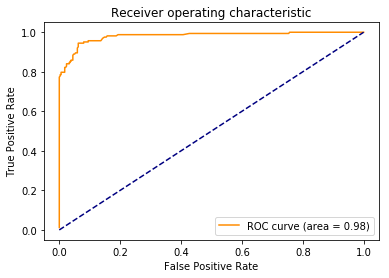

In [51]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [52]:
roc_auc = auc(fpr, tpr)
roc_auc

0.9807212685004824

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [53]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [54]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfcl.fit(X_, y_)
    y_pred = rfcl.predict(X_test)
    
    acc = accuracy_score(y, preds)
    accuracy.append(acc)

In [55]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.8720000000000001
Standard deviation:  1.1102230246251565e-16
